# rapyuta.plots
- plotrange
  + Btau
  + Ctau
  + [ellipse](#Ellipse)
  + SUE
- plotool
  + set_clib, set_fig, set_ax
  + reset_handles, append_handles, get_handles, set_legend
  + [plot](#plotool.plot), [eplot](#Ellipse)
  + [save](#plotool.save), show, close
  + transData2Axes, transData2Figure, transAxes2Data, transAxes2Figure,
- [pplot(plotool)](#pplot(plotool))
  + add_plot

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys
from pathlib import Path
import numpy as np
from pprint import pprint
import matplotlib.patches as mpatches

## Local
try:
    root = Path(__file__).parent.absolute() / '..'
except NameError:
    root = Path().absolute() / '..'
sys.path.insert(0, root)

from rapyuta.utbox import codefold
from rapyuta.inout import read_hdf5, fitsext, h5ext
from rapyuta.plots import plotool, pplot

%matplotlib inline

## fold inputs
# codefold(True, 'onclick')


               \  \|/  /
            \ _\_ ||| _/_ /
                  |||
              /\/-/|\-\/\
          _ | _M_ _|_ _M_ | _
        / .~.    _ ^ _    .~. \
       |_|_0_|  |_&_&_|  |_0_|_|
      //    .~.    o    .~.    \\
     |_M_ _|_?_|__[_]__|_?_|_ _M_|
            |             |
             \  rapyuta  /
               \       /         _
    * ¨^  .~       =           ~^' _-
      ~ °

        Version 2.2.2 (20220822)




In [2]:
## Set dir
datdir = root/'man/lib'
# outdir = root/'man/out'
outdir = root/'man/out/test_plots'
outdir.mkdir(parents=True, exist_ok=True)

datdir = str(datdir)
outdir = str(outdir)

## Prepare data

In [3]:
file_D2G = datdir+'/plotXY_D2G'
ref = read_hdf5(file_D2G, name="Sample")
mulogOovH = read_hdf5(file_D2G, "Mean of 12+log(OovH)")
siglogOovH = read_hdf5(file_D2G, "Sigma of 12+log(OovH)")
gamlogOovH = read_hdf5(file_D2G, "Skewness of 12+log(OovH)")
mulnD2G = read_hdf5(file_D2G, "Mean of ln(dust-to-gas ratio)")
siglnD2G = read_hdf5(file_D2G, "Sigma of ln(dust-to-gas ratio)")
gamlnD2G = read_hdf5(file_D2G, "Skewness of ln(dust-to-gas ratio)")
rho = read_hdf5(file_D2G, "Correlation of 12+log(OovH) and ln(dust-to-gas ratio)")
mask = np.isfinite(mulnD2G)
mux0 = mulogOovH[mask]
sigx0 = siglogOovH[mask]
gamx0 = gamlogOovH[mask]
mulny0 = mulnD2G[mask]
siglny0 = siglnD2G[mask]
gamlny0 = gamlnD2G[mask]
rho0 = rho[mask]
Nsamp = np.size(mulogOovH)

## plotrange

## Ellipse

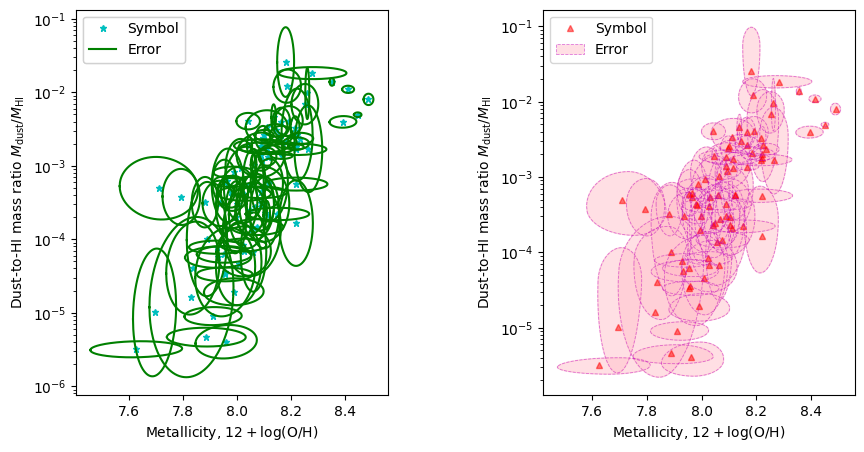

In [4]:
ep = plotool(1,2,figsize=(9,5))
ep.set_fig(right=.99,wspace=.5)

## Ellipses
ep.set_ax(ylog=1, ytkform='log_sci',
          xlabel=r'Metallicity, $12+\log({\rm O/H})$',
          ylabel=r'Dust-to-HI mass ratio $M_{\rm dust}$/$M_{\rm HI}$')
ep.plot(mux0, mulny0, fmt='c*', label='Symbol', yisln=True, 
        # c='c', marker='*',
        markersize=5)
ep.eplot(mux0, mulny0, sigmax=sigx0, sigmay=siglny0, rho=rho0,
         yisln=True, ec='g',errinlegend='Error')
ep.get_handles()
ep.set_legend(loc='upper left')

## Clear legend for new subplot
ep.reset_handles()

## Skewllipses
ep.set_ax((0,1), ylog=1, ytkform='log_sci',
          xlabel=r'Metallicity, $12+\log({\rm O/H})$',
          ylabel=r'Dust-to-HI mass ratio $M_{\rm dust}$/$M_{\rm HI}$')
ep.plot(mux0, mulny0, fmt='r^', label='Symbol', yisln=True, 
        markersize=5, alpha=.5)
ep.append_handles()
ec='m'
elw=.6
els='dashed'
efill=True
efc='pink'
errinlegend='Error'
alpha=.5
ehatch=None
ep.eplot(mux0, mulny0, sigmax=sigx0, sigmay=siglny0, rho=rho0,
         gammax=gamx0, gammay=gamlny0, yisln=True,
         ec=ec, elw=elw, els=els, efill=efill, efc=efc,
         ehatch=ehatch, errinlegend=errinlegend, alpha=alpha)
ep.append_handles()
## Replace line by patch in legend
epatch = mpatches.Patch(ec=ec, lw=elw, ls=els,
                        fill=efill, fc=efc, alpha=alpha,
                        hatch=ehatch, label=errinlegend)
ep.handles[-1] = epatch
ep.set_legend(loc='upper left')

### plotool.save

In [5]:
ep.save(outdir+'/ellipses')

### plotool.plot

## pplot(plotool)

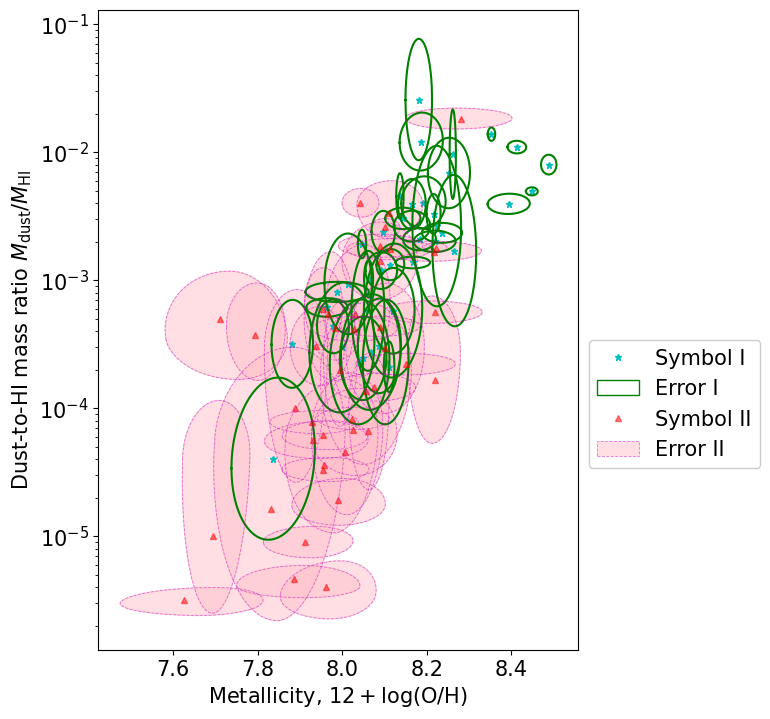

In [6]:
## Ellipses (half)
pp = pplot(mux0[:int(Nsamp/2)], mulny0[:int(Nsamp/2)],
           sigmax=sigx0[:int(Nsamp/2)], sigmay=siglny0[:int(Nsamp/2)], 
           rho=rho0[:int(Nsamp/2)],
           yisln=True, ec='g', errinlegend='Error I',
           figsize=(8,8), ylog=1, loc='center left', 
           right=.75, anchor=(1,.8), ytkform='log_sci',
           xlabel=r'Metallicity, $12+\log({\rm O/H})$',
           ylabel=r'Dust-to-HI mass ratio $M_{\rm dust}$/$M_{\rm HI}$',
           fmt='c*', label='Symbol I', markersize=5)

## Skewllipses (half)
pp.add_plot(mux0[int(Nsamp/2):], mulny0[int(Nsamp/2):],
            sigmax=sigx0[int(Nsamp/2):], sigmay=siglny0[int(Nsamp/2):], 
            rho=rho0[int(Nsamp/2):],
            gammax=gamx0[int(Nsamp/2):], gammay=gamlny0[int(Nsamp/2):],
            ec='m', elw=.6, els='dashed', efill=True, efc='pink',
            errinlegend='Error II', alpha=.5,
            yisln=True, 
            fmt='r^', label='Symbol II', markersize=5,
            addlegend=True, loc='upper left', anchor=(1,.5))

In [7]:
pp.save(outdir+'/test_pplot')